In [1]:
import optuna
import matplotlib.pyplot as plt
import numpy as np
from optuna.visualization.matplotlib import (
    plot_optimization_history,
    plot_param_importances,
    plot_slice,
    plot_contour,
    plot_edf,
)
import warnings
warnings.filterwarnings("ignore", category=optuna.exceptions.ExperimentalWarning)

/home/giorgos/python/generative_models/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## GAN

In [2]:
study = optuna.load_study(
    study_name="solar",
    storage="sqlite:///gan_study.db"
)

In [3]:
print("Best trial:", study.best_trial.number)
print("Best value:", study.best_value)
print("Best params:", study.best_trial.params)

Best trial: 49
Best value: 0.31656110286712646
Best params: {'n_critic': 15, 'gp_lambda': 8.438190642672637, 'd_lr': 0.00011154946118309682, 'g_lr': 0.00019786825158626928, 'z_dim': 64, 'hidden_dim': 1024}


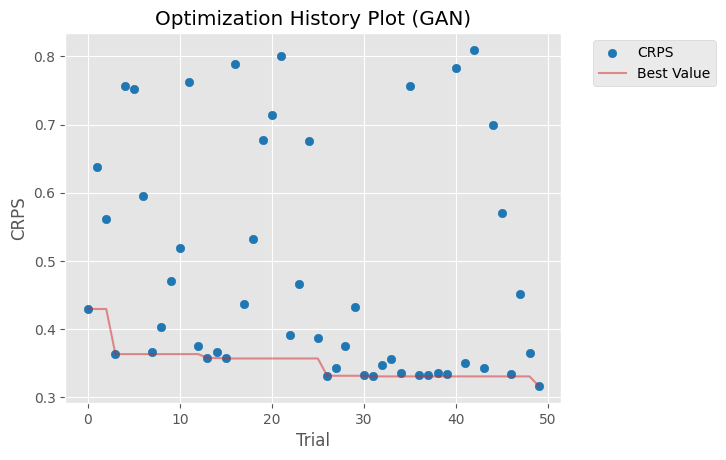

In [4]:
fig = plot_optimization_history(study, target_name="CRPS")
plt.title("Optimization History Plot (GAN)")
plt.ylabel("CRPS")
fig.figure.savefig("plots/hpo_optimization_history_gan_SOLAR.png", bbox_inches='tight')
plt.show()

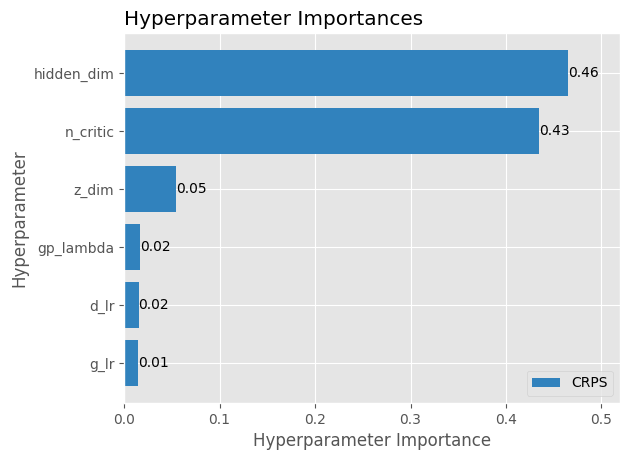

In [5]:
fig = plot_param_importances(study, target_name="CRPS")
fig.figure.savefig("plots/hpo_param_importances_gan_SOLAR.png")
plt.show()

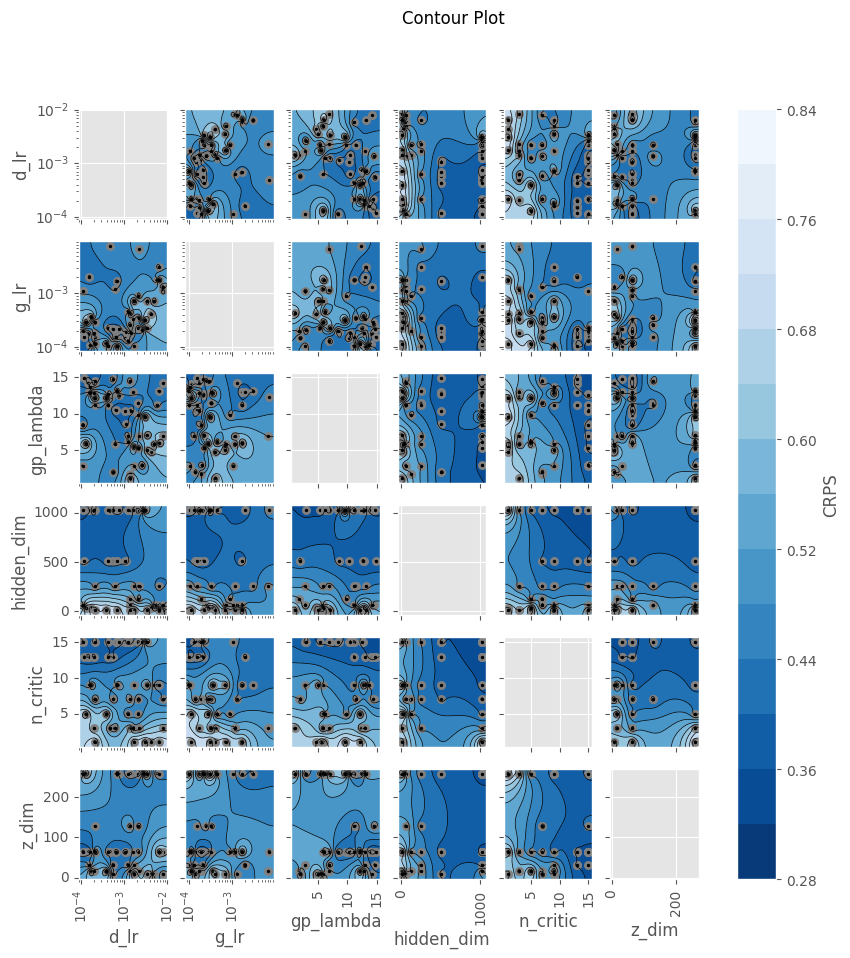

In [6]:
labels = ['d_lr', 'g_lr', 'gp_lambda', 'hidden_dim', 'n_critic', 'z_dim']

axes = plot_contour(study, params=labels, target_name="CRPS")  # returns numpy.ndarray of Axes
fig = axes.ravel()[0].figure               # get the figure
nrows, ncols = axes.shape

for (i, j), ax in np.ndenumerate(axes):
    # show x-labels only on bottom row
    if i != nrows - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        for t in ax.get_xticklabels():
            t.set_rotation(90)
            t.set_ha('center')

    # show y-labels only on left column
    if j != 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    else:
        for t in ax.get_yticklabels():
            t.set_rotation(0)
            t.set_va('center')

# increase figure size
fig.set_size_inches(10, 10)
plt.savefig("plots/hpo_contour_gan_SOLAR.png")


plt.show()


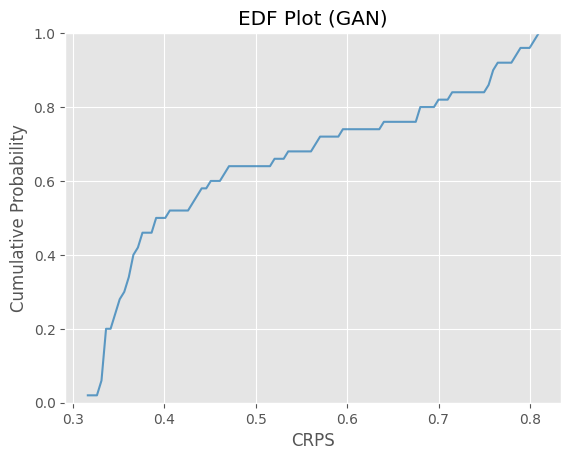

In [7]:
fig = plot_edf(study, target_name="CRPS")
plt.title("EDF Plot (GAN)")
plt.xlabel("CRPS")
fig.figure.savefig("plots/hpo_edf_gan_SOLAR.png")
plt.show()

/tmp/ipykernel_44058/3121336344.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[3].set_xticklabels(fig[3].get_xticklabels(), rotation=90)


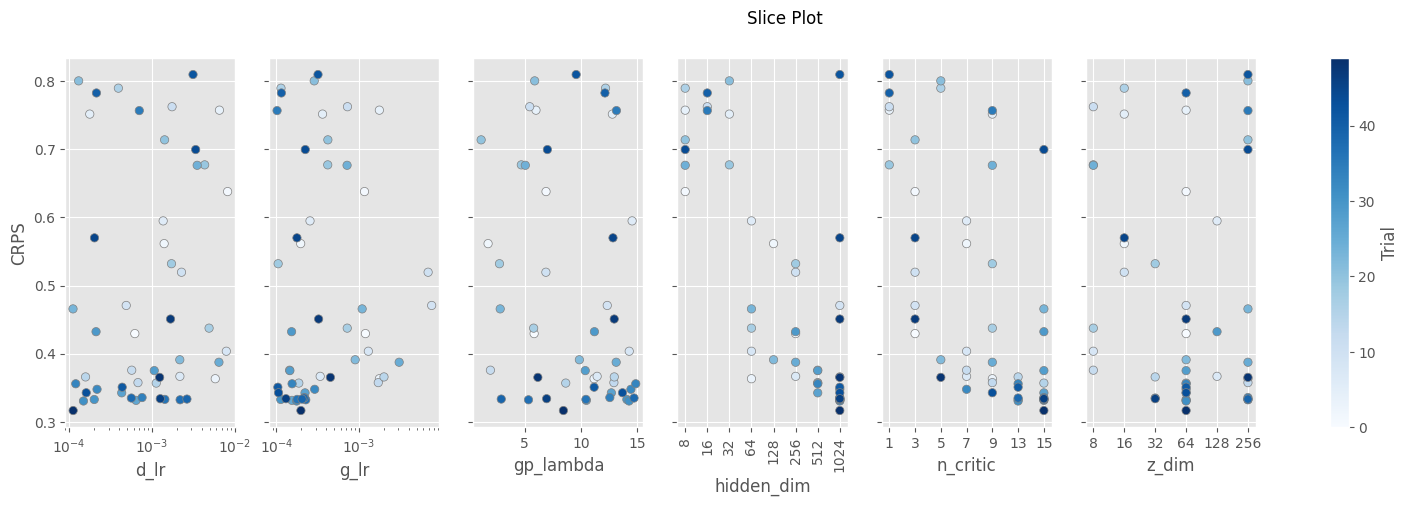

In [8]:
fig = plot_slice(study, target_name="CRPS")
fig[3].set_xticklabels(fig[3].get_xticklabels(), rotation=90)
plt.savefig("plots/hpo_slice_gan_SOLAR.png")
plt.show()

## VAE

In [9]:
study = optuna.load_study(
    study_name="solar",
    storage="sqlite:///vae_study.db"
)

In [10]:
print("Best trial:", study.best_trial.number)
print("Best value:", study.best_value)
print("Best params:", study.best_trial.params)

Best trial: 37
Best value: 0.3219525218009949
Best params: {'latent_s': 8, 'enc_w': 32, 'enc_l': 4, 'dec_w': 128, 'dec_l': 3, 'lr': 0.0012395783937187573}


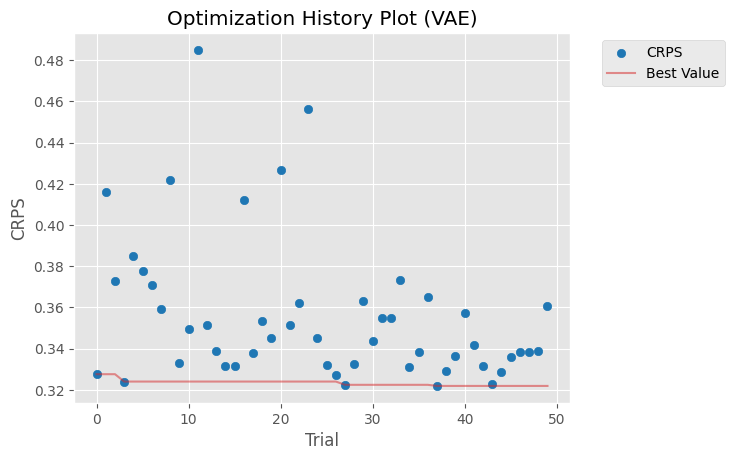

In [11]:
fig = plot_optimization_history(study, target_name="CRPS")
plt.title("Optimization History Plot (VAE)")
plt.ylabel("CRPS")
fig.figure.savefig("plots/hpo_optimization_history_vae_SOLAR.png", bbox_inches='tight')
plt.show()

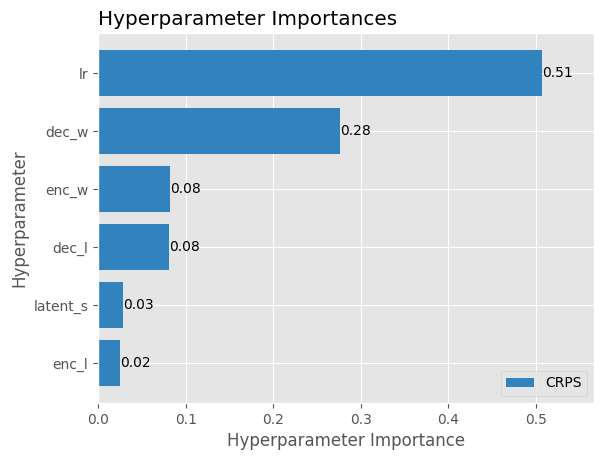

In [12]:
fig = plot_param_importances(study, target_name="CRPS")
fig.figure.savefig("plots/hpo_param_importances_vae_SOLAR.png")
plt.show()

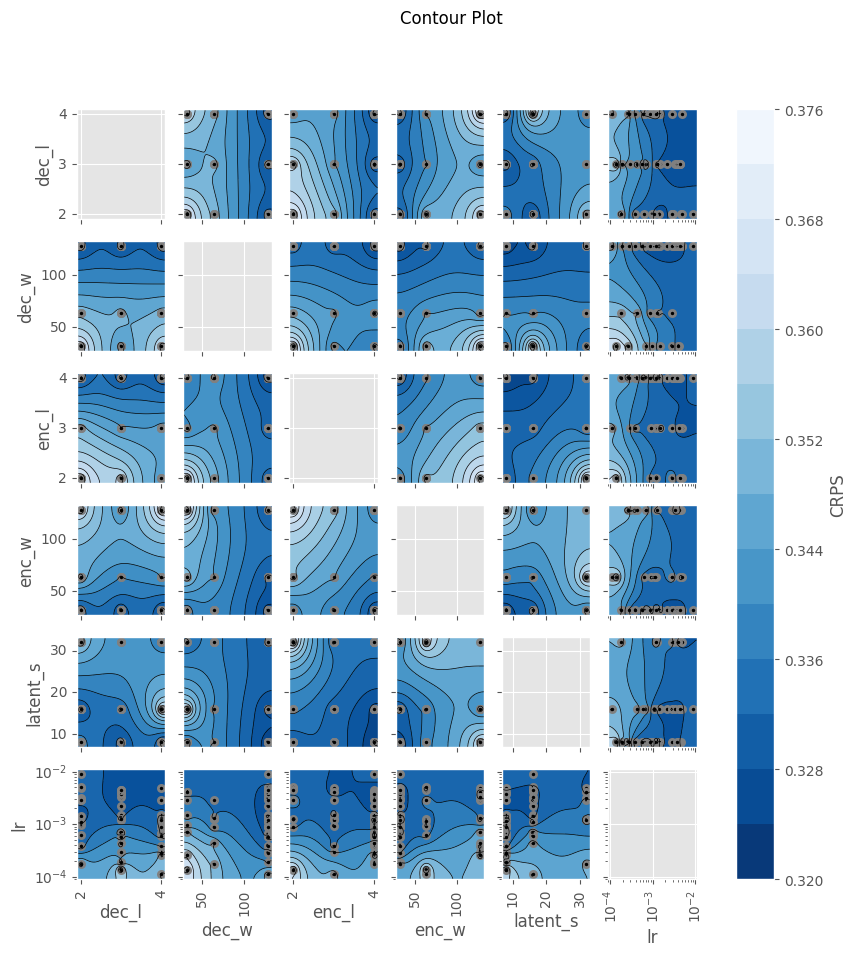

In [13]:
labels = ['latent_s', 'enc_w', 'enc_l', 'dec_w', 'dec_l', 'lr']

axes = plot_contour(study, params=labels, target_name="CRPS")  # returns numpy.ndarray of Axes
fig = axes.ravel()[0].figure               # get the figure
nrows, ncols = axes.shape

for (i, j), ax in np.ndenumerate(axes):
    # show x-labels only on bottom row
    if i != nrows - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        for t in ax.get_xticklabels():
            t.set_rotation(90)
            t.set_ha('center')

    # show y-labels only on left column
    if j != 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    else:
        for t in ax.get_yticklabels():
            t.set_rotation(0)
            t.set_va('center')

# increase figure size
fig.set_size_inches(10, 10)
plt.savefig("plots/hpo_contour_vae_SOLAR.png")

plt.show()


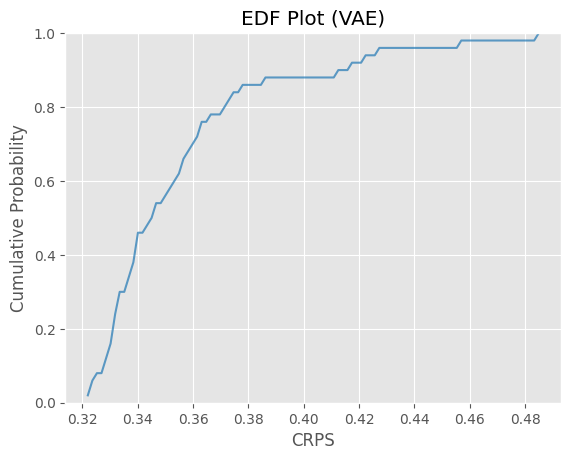

In [14]:
fig = plot_edf(study)
plt.title("EDF Plot (VAE)")
plt.xlabel("CRPS")
fig.figure.savefig("plots/hpo_edf_vae_SOLAR.png")
plt.show()

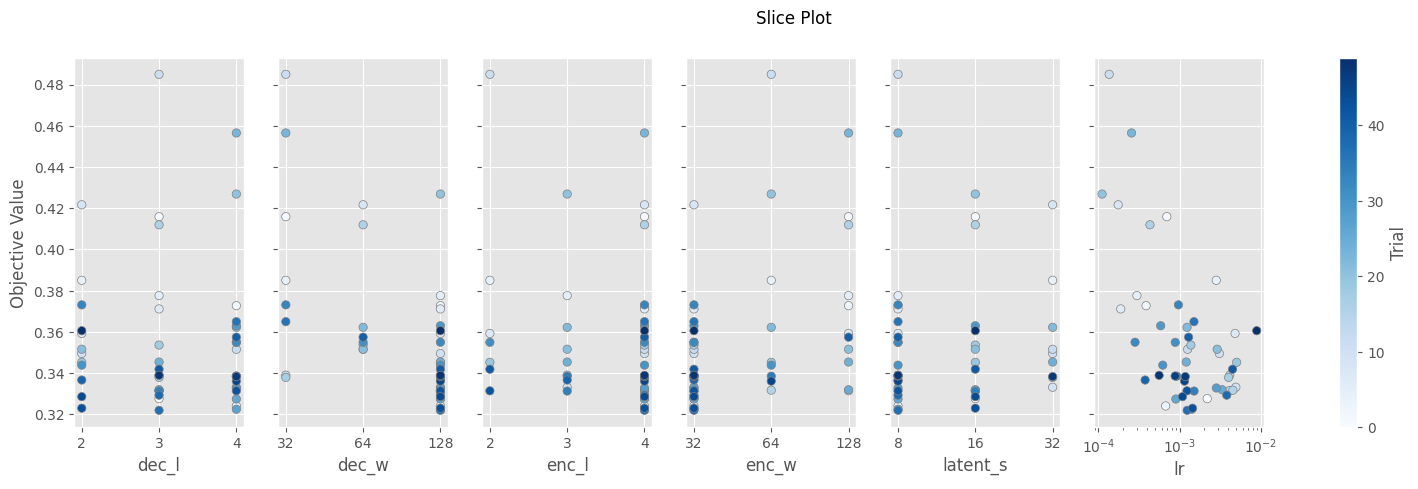

In [15]:
fig = plot_slice(study)
plt.savefig("plots/hpo_slice_vae_SOLAR.png")
plt.show()

## NAF

In [16]:
study = optuna.load_study(
    study_name="solar",
    storage="sqlite:///naf_study.db"
)

In [17]:
print("Best trial:", study.best_trial.number)
print("Best value:", study.best_value)
print("Best params:", study.best_trial.params)

Best trial: 11
Best value: 0.2813408076763153
Best params: {'n_layers': 2, 'width_exp': 4, 'transforms': 2, 'lr': 0.0029717587743752607}


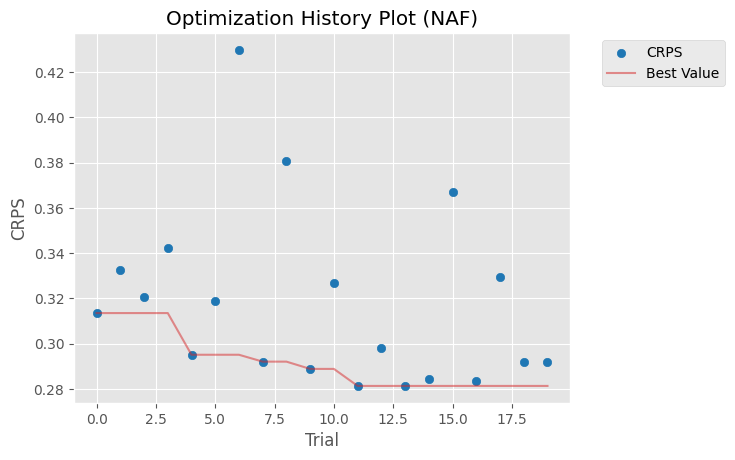

In [18]:
fig = plot_optimization_history(study, target_name="CRPS")
plt.title("Optimization History Plot (NAF)")
plt.ylabel("CRPS")
fig.figure.savefig("plots/hpo_optimization_history_naf_SOLAR.png", bbox_inches='tight')
plt.show()

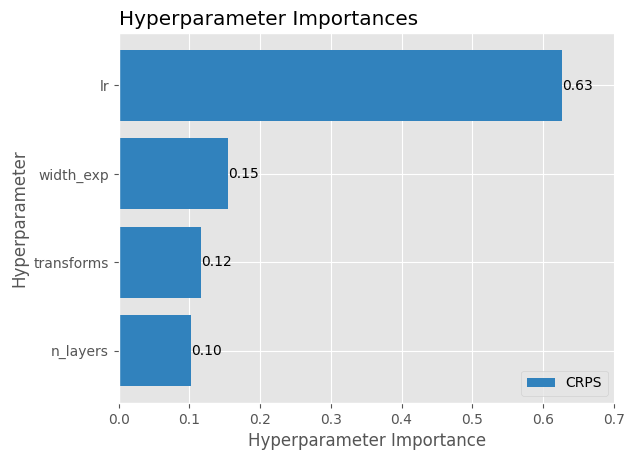

In [19]:
fig = plot_param_importances(study, target_name="CRPS")
fig.figure.savefig("plots/hpo_param_importances_naf_SOLAR.png")
plt.show()

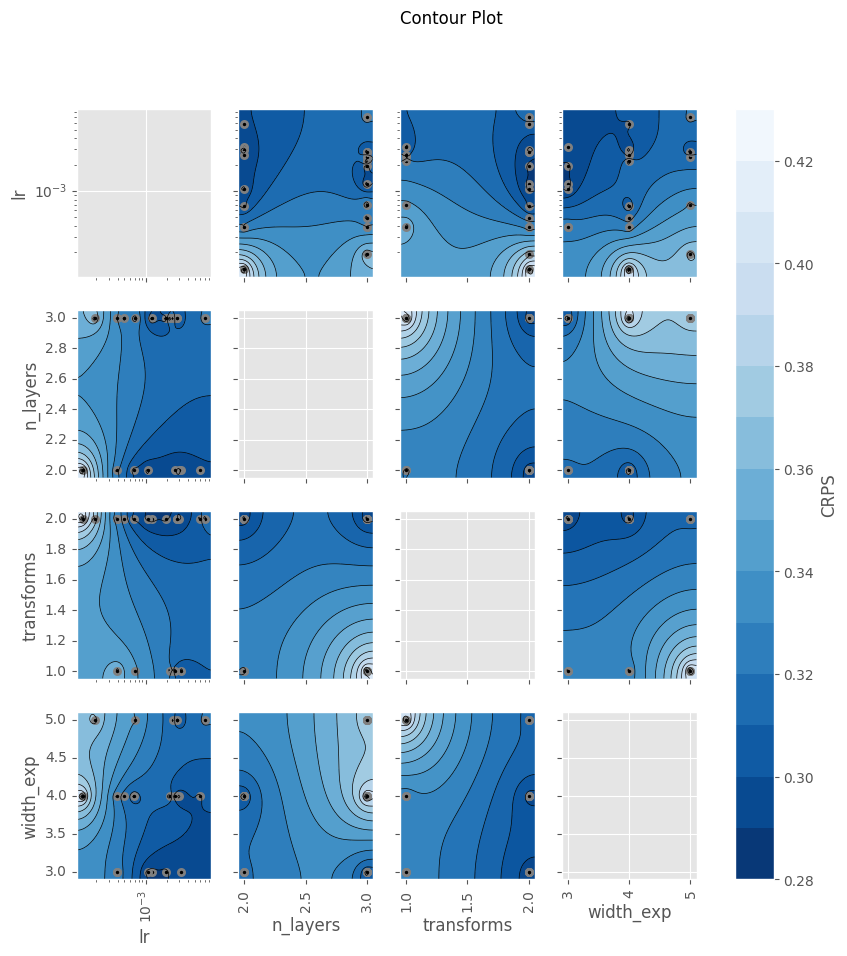

In [20]:
labels = ['n_layers', 'width_exp', 'transforms', 'lr']

axes = plot_contour(study, params=labels, target_name="CRPS")  # returns numpy.ndarray of Axes
fig = axes.ravel()[0].figure               # get the figure
nrows, ncols = axes.shape

for (i, j), ax in np.ndenumerate(axes):
    # show x-labels only on bottom row
    if i != nrows - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        for t in ax.get_xticklabels():
            t.set_rotation(90)
            t.set_ha('center')

    # show y-labels only on left column
    if j != 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    else:
        for t in ax.get_yticklabels():
            t.set_rotation(0)
            t.set_va('center')

# increase figure size
fig.set_size_inches(10, 10)
plt.savefig("plots/hpo_contour_naf_SOLAR.png")


plt.show()


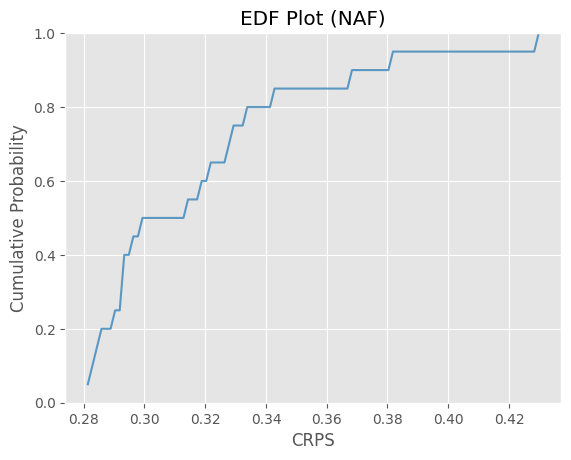

In [21]:
fig = plot_edf(study)
plt.title("EDF Plot (NAF)")
plt.xlabel("CRPS")
fig.figure.savefig("plots/hpo_edf_naf_SOLAR.png")
plt.show()

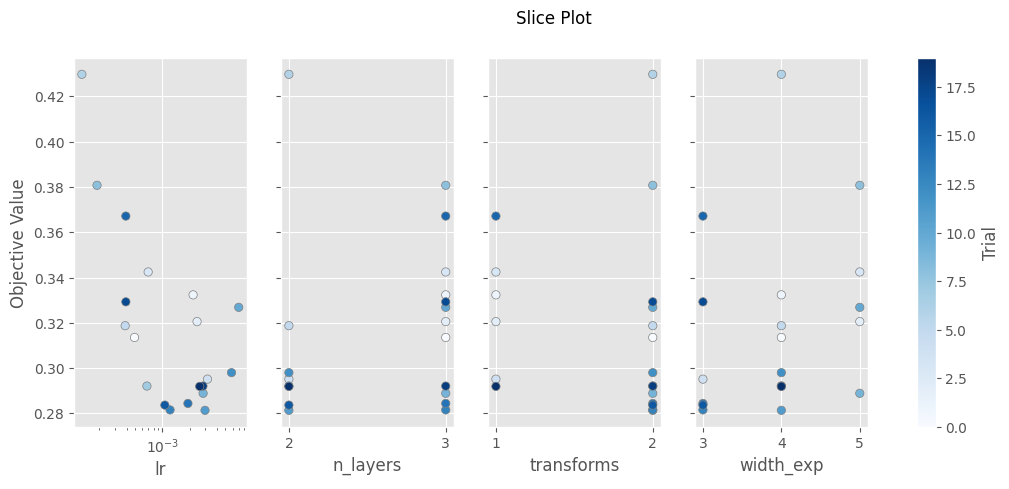

In [22]:
fig = plot_slice(study)
plt.savefig("plots/hpo_slice_naf_SOLAR.png")
plt.show()

## NSF

In [23]:
study = optuna.load_study(
    study_name="solar",
    storage="sqlite:///nsf_study.db"
)

In [24]:
print("Best trial:", study.best_trial.number)
print("Best value:", study.best_value)
print("Best params:", study.best_trial.params)

Best trial: 23
Best value: 0.2618245780467987
Best params: {'n_layers': 2, 'width_exp': 5, 'transforms': 5, 'lr': 0.0021291100157187545}


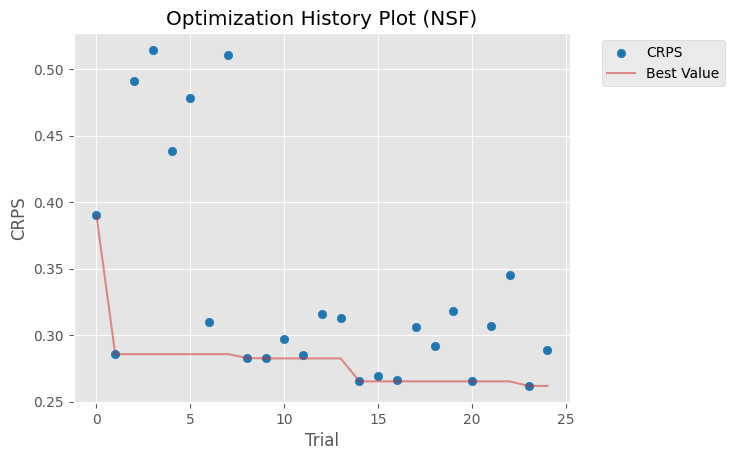

In [25]:
fig = plot_optimization_history(study, target_name="CRPS")
plt.title("Optimization History Plot (NSF)")
plt.ylabel("CRPS")
fig.figure.savefig("plots/hpo_optimization_history_nsf_SOLAR.png", bbox_inches='tight')
plt.show()

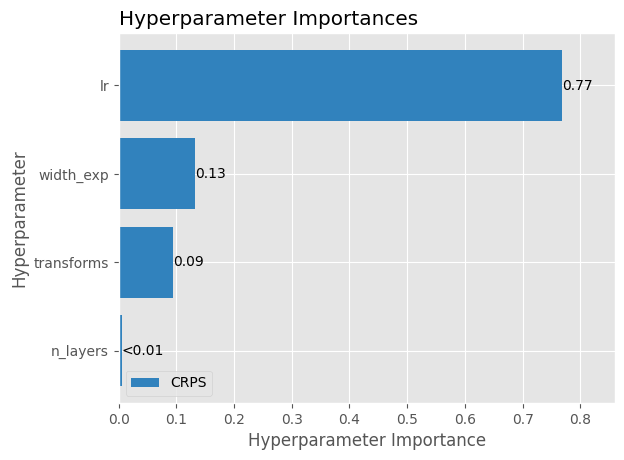

In [26]:
fig = plot_param_importances(study, target_name="CRPS")
fig.figure.savefig("plots/hpo_param_importances_nsf_SOLAR.png")
plt.show()

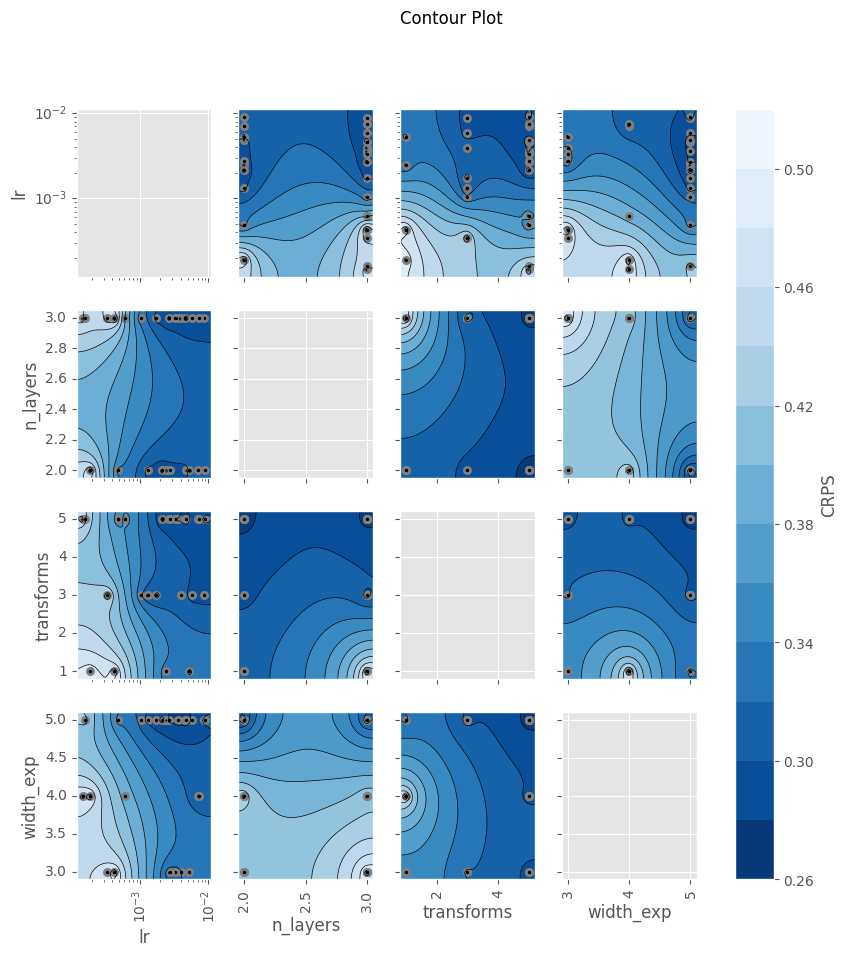

In [27]:
labels = ['n_layers', 'width_exp', 'transforms', 'lr']


axes = plot_contour(study, params=labels, target_name="CRPS")  # returns numpy.ndarray of Axes
fig = axes.ravel()[0].figure               # get the figure
nrows, ncols = axes.shape

for (i, j), ax in np.ndenumerate(axes):
    # show x-labels only on bottom row
    if i != nrows - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        for t in ax.get_xticklabels():
            t.set_rotation(90)
            t.set_ha('center')

    # show y-labels only on left column
    if j != 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    else:
        for t in ax.get_yticklabels():
            t.set_rotation(0)
            t.set_va('center')

# increase figure size
fig.set_size_inches(10, 10)
plt.savefig("plots/hpo_contour_nsf_SOLAR.png")

plt.show()

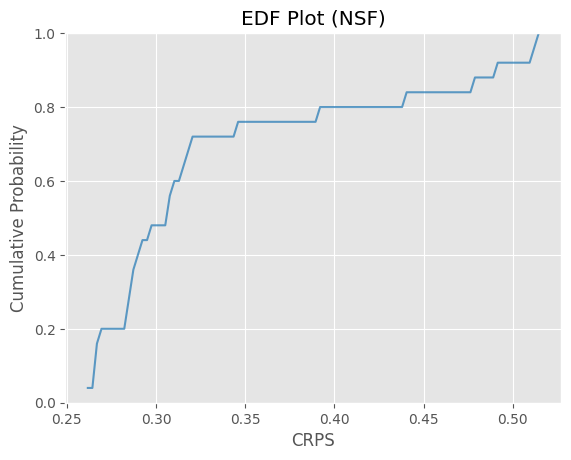

In [28]:
fig = plot_edf(study)
plt.title("EDF Plot (NSF)")
plt.xlabel("CRPS")
fig.figure.savefig("plots/hpo_edf_nsf_SOLAR.png")
plt.show()

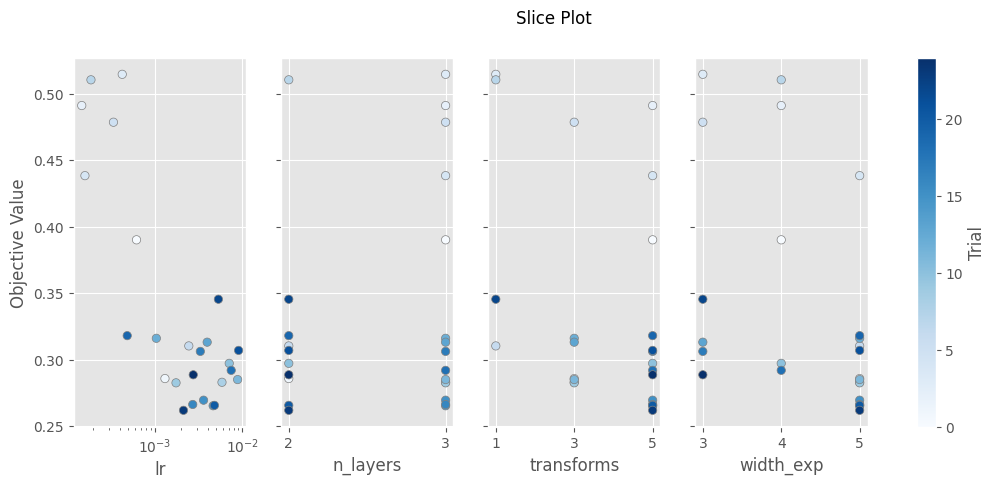

In [29]:
fig = plot_slice(study)
plt.savefig("plots/hpo_slice_nsf_SOLAR.png")
plt.show()